In [1]:
#importando pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



In [2]:
#carregando dataset
df=  pd.read_csv('casakingcout.csv')

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
#removendo variáveis
dadoslimpo=df.drop(['id','date'],axis=1)

In [6]:
#defenindo atributos e alvo
x=dadoslimpo.drop('price',axis=1)
y=dadoslimpo['price']

In [7]:
# ANALISANDO MULTICOLINEARIDADE

correlation_matrix = df.corr(numeric_only=True)
# Verificando as correlações fortes 
strong_correlations = (correlation_matrix > 0.7) & (correlation_matrix < 1.0)
# Identificando as criáveis com multicolinearidade
multicollinear_vars = set()
for col in strong_correlations.columns:
    correlated_vars = strong_correlations.index[strong_correlations[col]]
    if len(correlated_vars) > 1:
        multicollinear_vars.update(correlated_vars)

if multicollinear_vars:
    print("\nVariáveis com multicolinearidade:{}".format(multicollinear_vars))
    
else:
    print("\nNão foi encontrada multicolinearidade entre as variáveis.")



Variáveis com multicolinearidade:{'sqft_living15', 'price', 'grade', 'sqft_above', 'bathrooms', 'sqft_living'}


<Axes: >

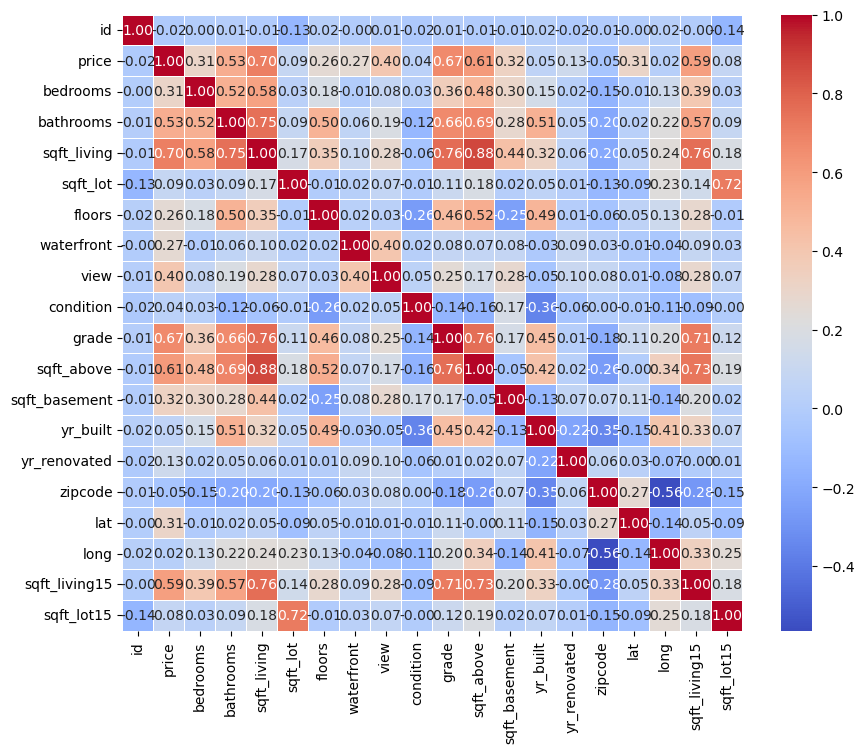

In [8]:
#grafico de corrrelaçao
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

In [9]:
dadoslimpo=dadoslimpo.drop(['sqft_living15', 'bathrooms', 'sqft_above', 'grade', 'sqft_living'],axis=1)


In [10]:
dadoslimpo

,price,bedrooms,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15
0,221900.0,3,5650,1.0,0,0,3,0,1955,0,98178,47.5112,-122.257,5650
1,538000.0,3,7242,2.0,0,0,3,400,1951,1991,98125,47.7210,-122.319,7639
2,180000.0,2,10000,1.0,0,0,3,0,1933,0,98028,47.7379,-122.233,8062
3,604000.0,4,5000,1.0,0,0,5,910,1965,0,98136,47.5208,-122.393,5000
4,510000.0,3,8080,1.0,0,0,3,0,1987,0,98074,47.6168,-122.045,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,1131,3.0,0,0,3,0,2009,0,98103,47.6993,-122.346,1509
21609,400000.0,4,5813,2.0,0,0,3,0,2014,0,98146,47.5107,-122.362,7200
21610,402101.0,2,1350,2.0,0,0,3,0,2009,0,98144,47.5944,-122.299,2007
21611,400000.0,3,2388,2.0,0,0,3,0,2004,0,98027,47.5345,-122.069,1287


In [11]:
# Dividindo os dados em conjuntos de treinamento e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.30, random_state=10)
# Treinar o modelo usando os dados de treinamento
modelo=LinearRegression()
modelo.fit(x_treino, y_treino)


LinearRegression()

In [12]:
#previsões nos dados de teste
y_pred = modelo.predict(x_teste)


In [13]:
#avaliando acuracia pelo erro quadrado
r2 =r2_score(y_teste, y_pred)
print(r2)

0.7097660077351857
